# Detecting Human Activities Through Smartwatch Sensor - Decision Tree Training


- Data set source:  WISDM Lab of Frodham University, NY
https://archive.ics.uci.edu/dataset/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset

Data captured using

- Two kinds of devices:
    - Smartphone (Samsung Galaxy S5)
    - Smartwatch (LG G)

    
- Two kinds of embedded kinematic sensors (for each device):
    - Accelerometer - for measurement of linear acceleration (m/sec^2)
    - Gyroscope - for measurement of angular velocity (rad/sec)


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
from tqdm import tqdm
import filecmp

PBAR_FORMAT='{desc:12}{percentage:3.0f}%|{bar:27}[ {n:4d}/{total:4d}, {elapsed}<{remaining}{postfix} ]'

Each activity is represented as an alphabet in the dataset. To make meaningful inference of data we map it to actual activity

In [10]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

In [1]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)


93

In [7]:
#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'../dataset/arff_files/phone/accel/'
all_files = glob.glob(path + "/*.arff")

list_dfs_phone_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_accel.append(df)

all_phone_accel = pd.concat(list_dfs_phone_accel, axis=0, ignore_index=True, sort=False)

all_phone_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.130,0.575,0.180,0.085,0.030,0.000,0.0,0.0,0.0,...,0.520157,0.513473,0.108732,0.097776,-0.411714,-0.176697,0.198464,-0.004147,10.02830,1622
1,A,0.160,0.515,0.220,0.075,0.030,0.000,0.0,0.0,0.0,...,0.532958,0.526109,0.224341,-0.179526,-0.299404,0.010991,-0.114707,-0.012004,10.09600,1622
2,A,0.175,0.485,0.225,0.080,0.035,0.000,0.0,0.0,0.0,...,0.492116,0.485792,0.175455,0.027462,-0.435015,0.041981,0.120323,-0.007766,10.02780,1622
3,A,0.175,0.450,0.265,0.075,0.030,0.005,0.0,0.0,0.0,...,0.515510,0.508886,0.120812,-0.015848,-0.301633,-0.103904,0.048050,0.146110,10.16850,1622
4,A,0.195,0.445,0.265,0.050,0.040,0.005,0.0,0.0,0.0,...,0.551381,0.544296,0.148181,-0.023412,-0.326639,-0.104788,0.049690,-0.014000,10.12370,1622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20645,S,0.000,0.155,0.785,0.060,0.000,0.000,0.0,0.0,0.0,...,0.354421,0.349866,0.734725,0.623652,0.712336,0.083031,0.215025,0.067965,9.81272,1601
20646,S,0.000,0.025,0.920,0.055,0.000,0.000,0.0,0.0,0.0,...,0.344785,0.340354,0.792723,0.527553,0.636713,-0.379874,0.037627,-0.052030,9.76865,1601
20647,S,0.010,0.225,0.690,0.070,0.005,0.000,0.0,0.0,0.0,...,0.396321,0.391228,0.597462,0.347826,0.522830,0.047360,0.073948,0.302462,9.85002,1601
20648,S,0.000,0.055,0.900,0.045,0.000,0.000,0.0,0.0,0.0,...,0.309351,0.305376,0.852767,0.532618,0.649760,-0.159023,-0.045034,0.254039,9.76942,1601


In [8]:
all_phone_accel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20650 entries, 0 to 20649
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     20650 non-null  object 
 1   X0           20650 non-null  float64
 2   X1           20650 non-null  float64
 3   X2           20650 non-null  float64
 4   X3           20650 non-null  float64
 5   X4           20650 non-null  float64
 6   X5           20650 non-null  float64
 7   X6           20650 non-null  float64
 8   X7           20650 non-null  float64
 9   X8           20650 non-null  float64
 10  X9           20650 non-null  float64
 11  Y0           20650 non-null  float64
 12  Y1           20650 non-null  float64
 13  Y2           20650 non-null  float64
 14  Y3           20650 non-null  float64
 15  Y4           20650 non-null  float64
 16  Y5           20650 non-null  float64
 17  Y6           20650 non-null  float64
 18  Y7           20650 non-null  float64
 19  Y8  

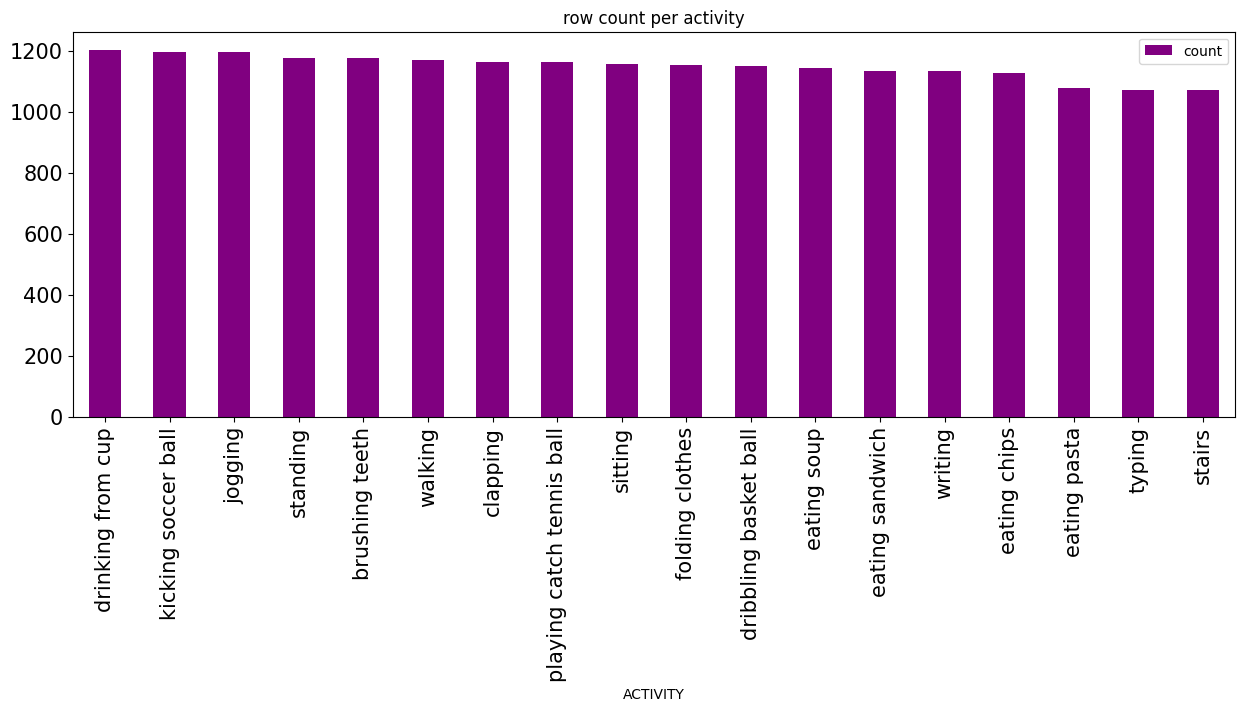

In [11]:
_ = all_phone_accel['ACTIVITY'].map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (15,5), color = 'purple', title = 'row count per activity', legend = True, fontsize = 15)

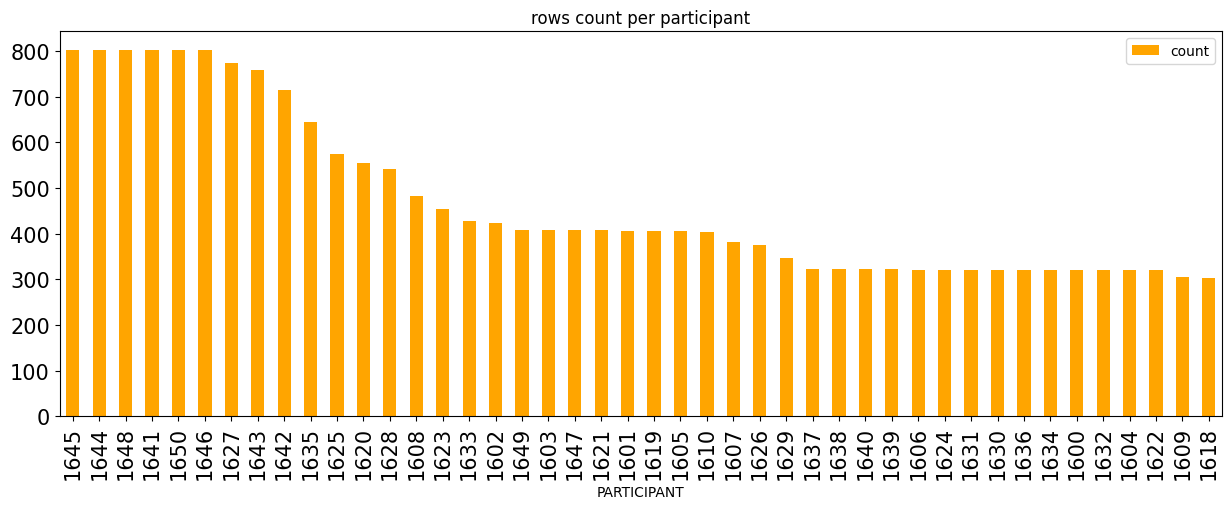

In [12]:
_ = all_phone_accel['PARTICIPANT'].value_counts().plot(kind = 'bar', figsize = (15,5), color = 'orange', title= 'rows count per participant', legend = True, fontsize = 15)

In [13]:
all_phone_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR']].head()

,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR
0,1.48254,2.70026,1.79925,0.151792,0.241008,0.176089,0.389604,0.490925,0.419630
1,1.66162,2.75829,1.84823,0.155757,0.240979,0.185271,0.394660,0.490896,0.430431
2,1.71527,2.56516,1.69634,0.161478,0.220958,0.162885,0.401844,0.470062,0.403590
3,1.69549,2.68950,1.65756,0.164021,0.236315,0.162121,0.404996,0.486123,0.402642
4,1.84790,2.98951,2.01376,0.177318,0.260651,0.202847,0.421092,0.510540,0.450385


In [14]:
all_phone_accel.drop(['XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR'], axis = 1, inplace = True)

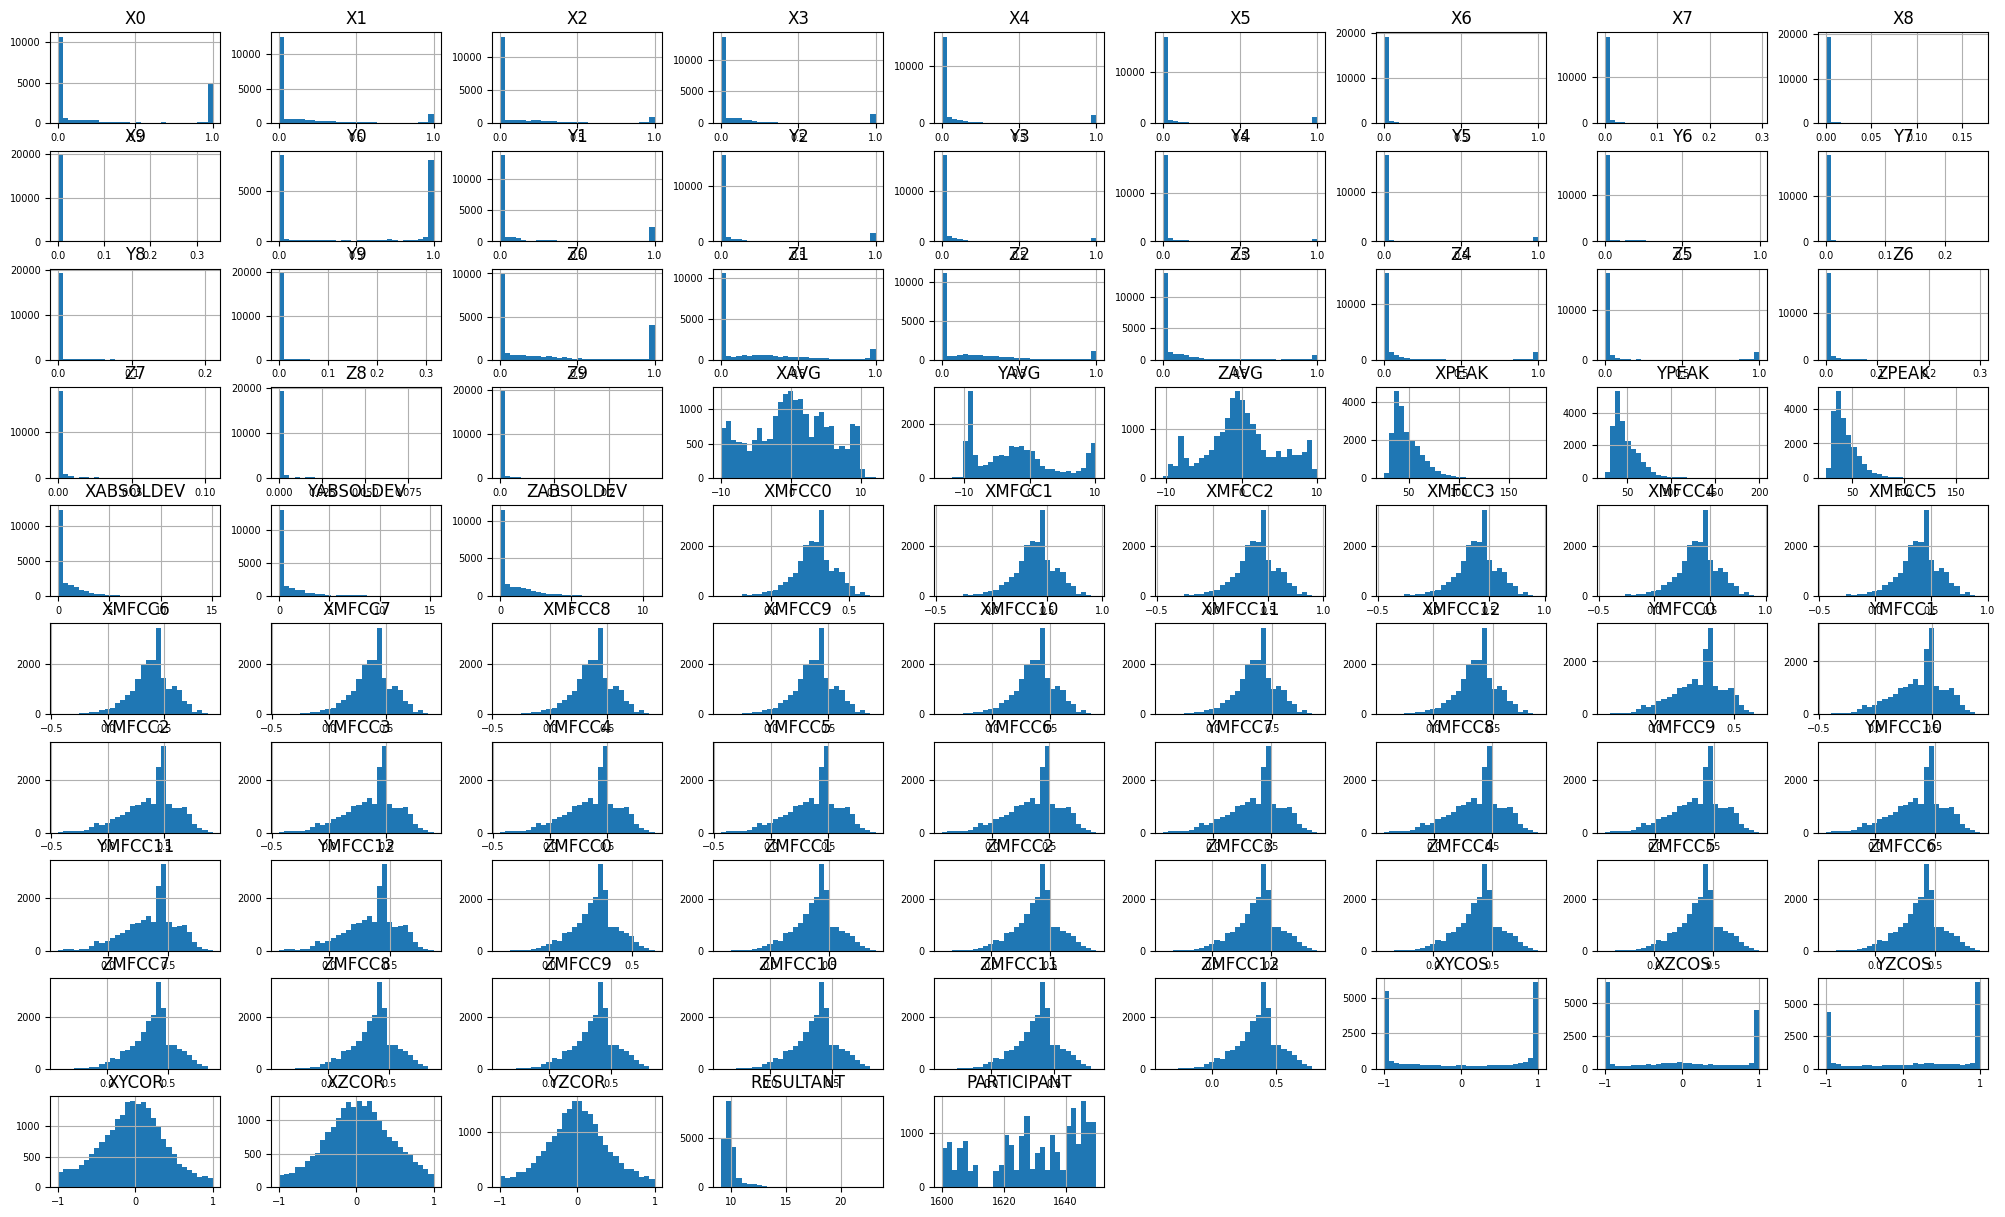

In [15]:
ax = all_phone_accel.hist(bins=30, figsize=(25, 15), xlabelsize = 7, ylabelsize = 7)

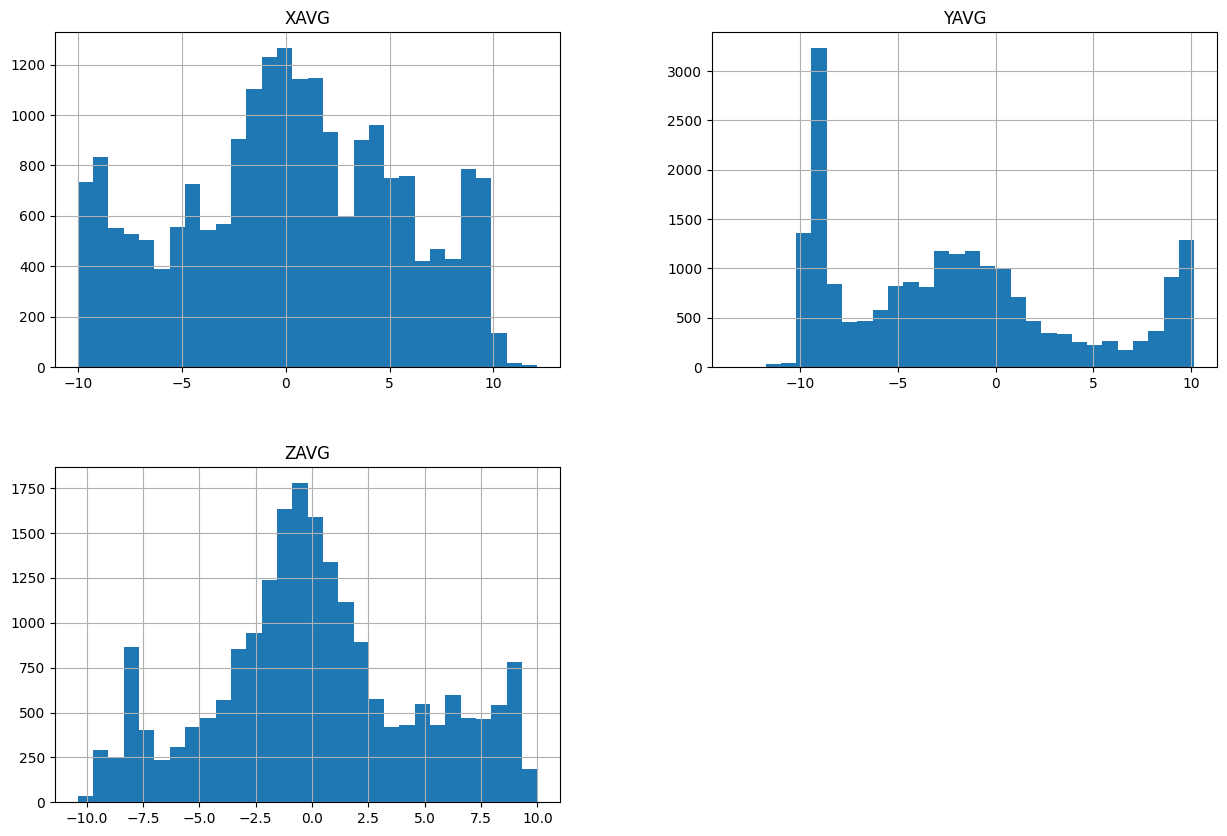

In [16]:
_ = all_phone_accel[['XAVG', 'YAVG', 'ZAVG']].hist(bins=30, figsize=(15, 10))

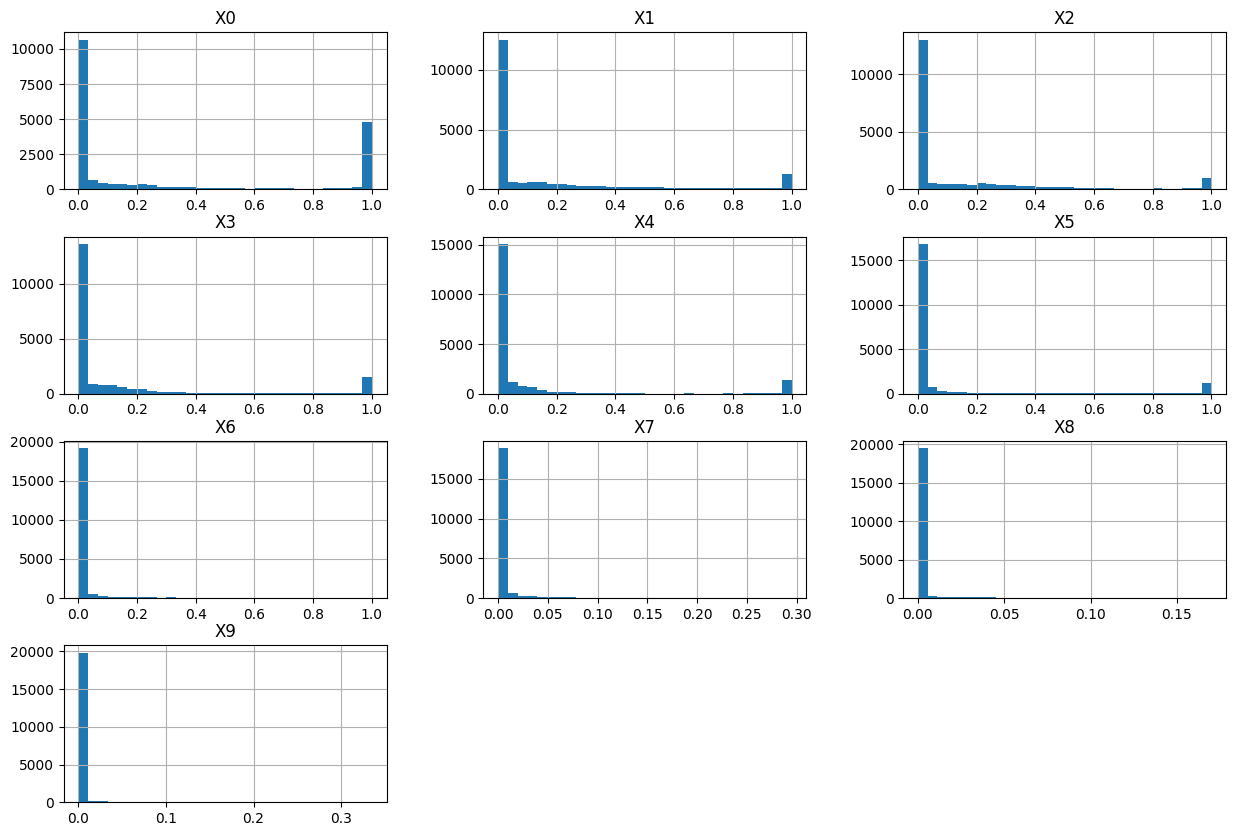

In [17]:
_ = all_phone_accel[['X0', 'X1', 'X2', 'X3','X4','X5','X6','X7','X8','X9']].hist(bins=30, figsize=(15, 10))

/tmp/ipykernel_2591177/3945275506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(all_phone_accel['XAVG'])


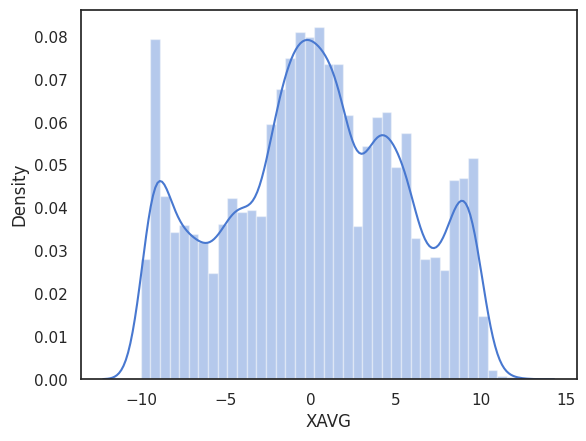

In [19]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
_ = sns.distplot(all_phone_accel['XAVG'])

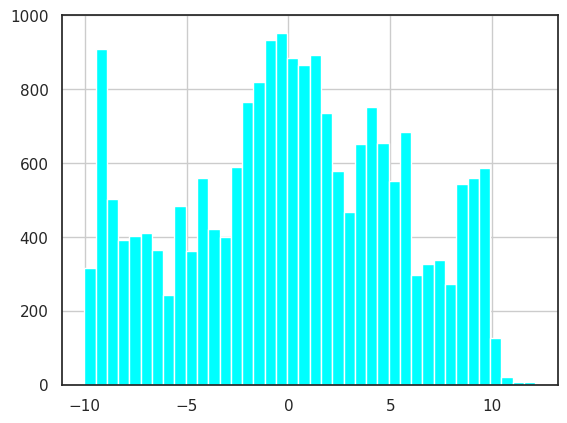

In [20]:
_ = all_phone_accel['XAVG'].hist(bins=40, color = 'cyan')

/tmp/ipykernel_2591177/3909427808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(all_phone_accel['YAVG'])


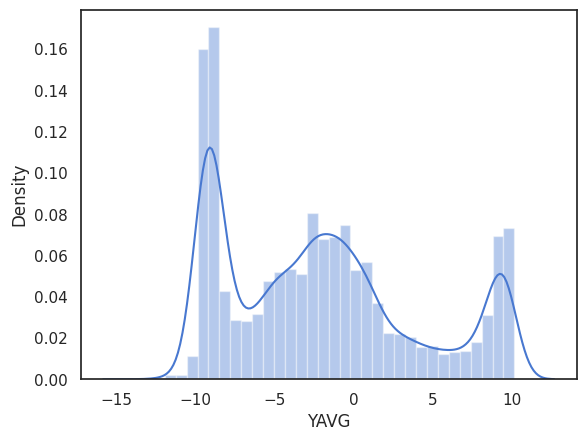

In [21]:
_ = sns.distplot(all_phone_accel['YAVG'])

/tmp/ipykernel_2591177/3604163818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(all_phone_accel['ZAVG'])


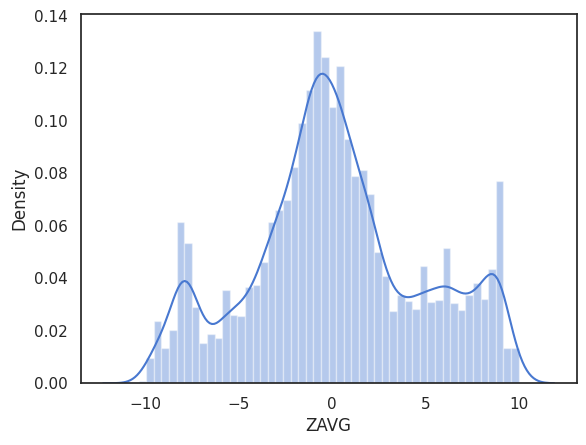

In [22]:
_ = sns.distplot(all_phone_accel['ZAVG'])

/tmp/ipykernel_2591177/3659320045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(all_phone_accel['XYCOR'])


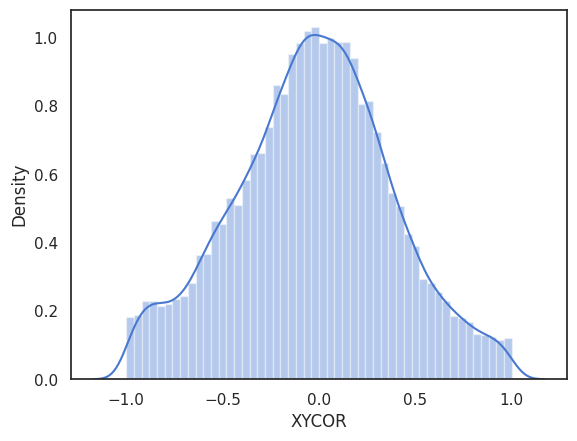

In [23]:
_ = sns.distplot(all_phone_accel['XYCOR'])


/tmp/ipykernel_2591177/2490745790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(all_phone_accel['XYCOS'])


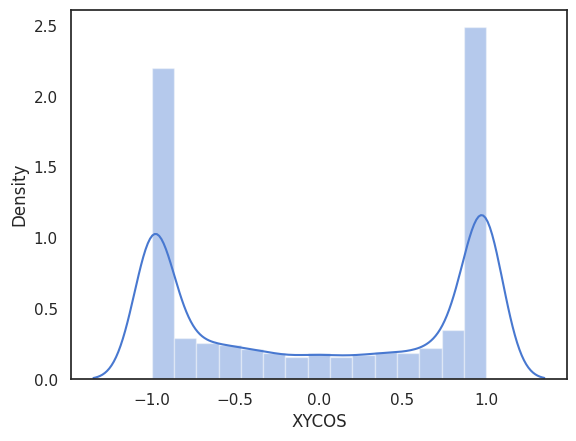

In [24]:
_ = sns.distplot(all_phone_accel['XYCOS'])

/tmp/ipykernel_2591177/2946045803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(all_phone_accel['RESULTANT'])


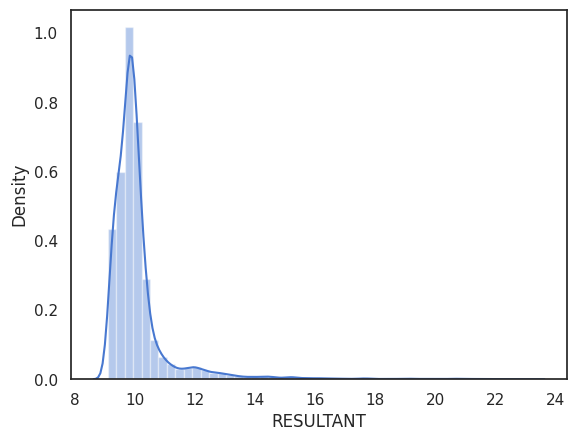

In [25]:
_ = sns.distplot(all_phone_accel['RESULTANT'])

/tmp/ipykernel_2591177/3330296450.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(all_phone_accel['YMFCC5'])


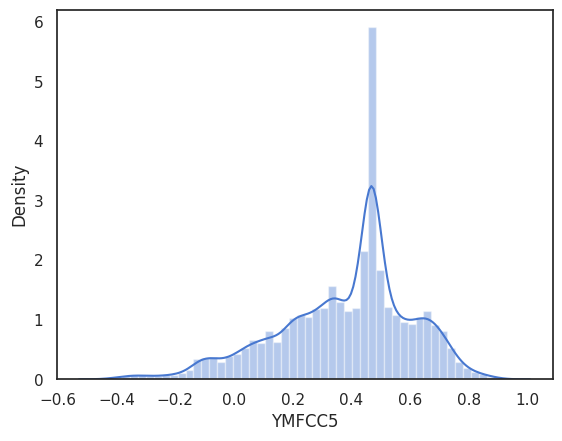

In [26]:
_ = sns.distplot(all_phone_accel['YMFCC5'])

In [27]:
all_phone_accel.drop('PARTICIPANT', axis = 1, inplace = True)

In [28]:
from sklearn.model_selection import train_test_split

y = all_phone_accel.ACTIVITY
X = all_phone_accel.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = all_phone_accel.ACTIVITY)

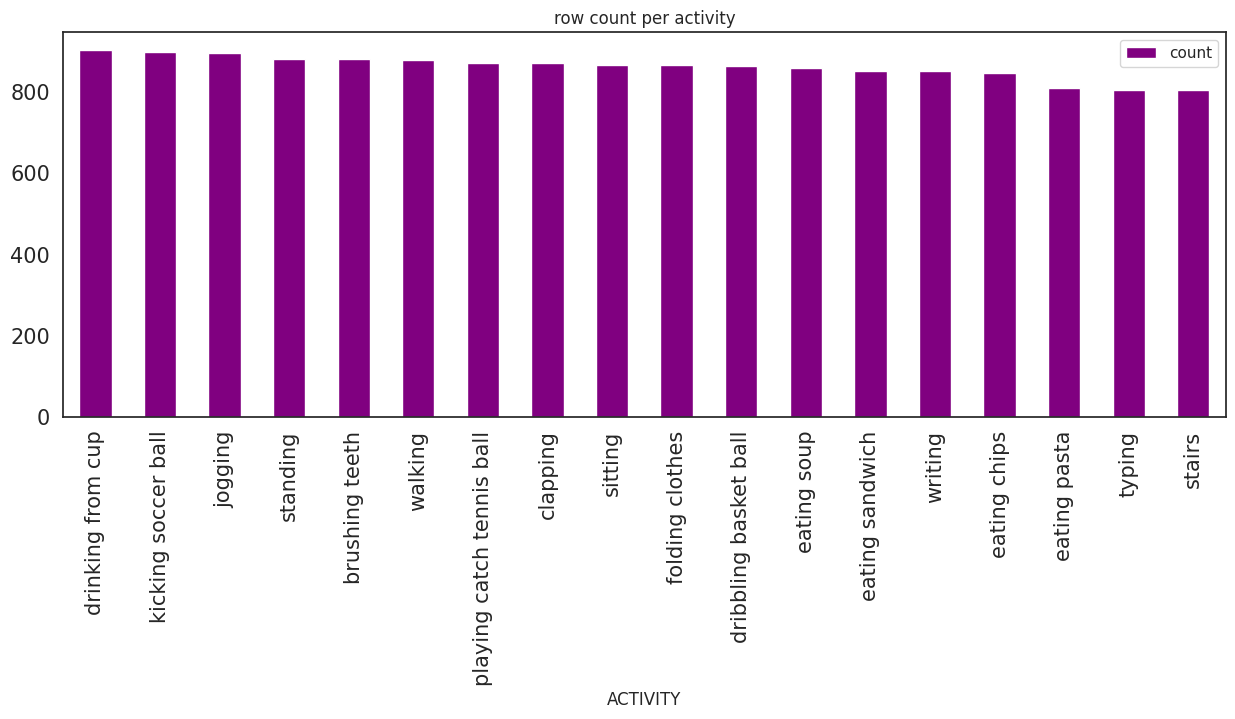

In [29]:
_ = y_train.map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (15,5), color = 'purple', title = 'row count per activity', legend = True, fontsize = 15)

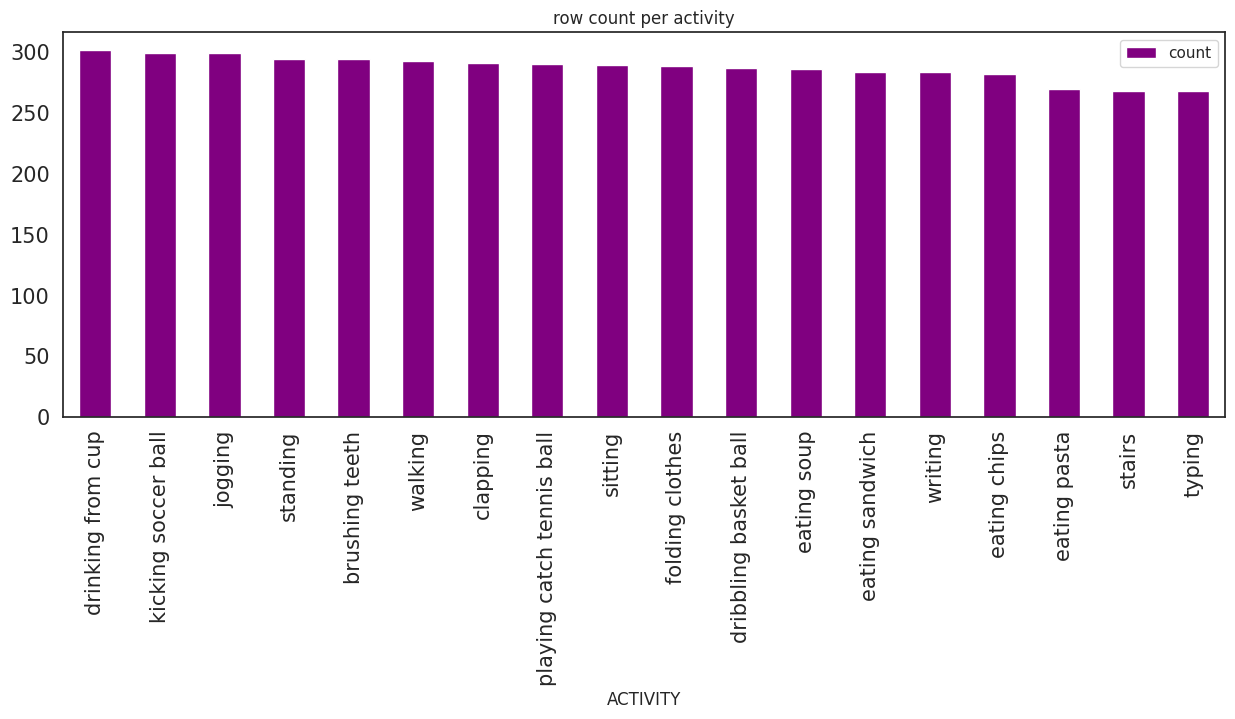

In [30]:
_ = y_test.map(activity_codes_mapping).value_counts().plot(kind = 'bar', figsize = (15,5), color = 'purple', title = 'row count per activity', legend = True, fontsize = 15)

In [31]:
X_train.insert(0, 'Y', y_train)
X_train

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
6848,Q,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.232703,0.229993,0.227038,-0.999923,0.999985,-0.999900,0.167493,0.112014,0.159874,9.54934
15359,H,0.000,0.985,0.015,0.000,0.000,0.000,0.000,0.000,0.000,...,0.437666,0.432570,0.427012,-0.964646,-0.966778,0.999785,0.461206,0.255302,0.109245,9.17845
14349,P,0.100,0.860,0.035,0.000,0.005,0.000,0.000,0.000,0.000,...,0.426631,0.421664,0.416246,0.839945,0.093651,0.452772,0.047660,-0.605161,-0.358667,9.86357
10487,A,0.275,0.165,0.220,0.210,0.085,0.015,0.000,0.005,0.005,...,0.560382,0.553858,0.546741,-0.347670,-0.377510,0.280716,-0.534463,-0.372099,0.420908,11.49380
9832,A,0.150,0.405,0.375,0.060,0.000,0.010,0.000,0.000,0.000,...,0.509081,0.503154,0.496688,-0.076176,0.112473,-0.000427,0.231612,0.085801,0.371591,10.30250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,C,0.020,0.100,0.315,0.305,0.180,0.055,0.025,0.000,0.000,...,0.471500,0.466010,0.460022,-0.763774,-0.507724,0.472375,-0.290459,-0.223943,0.021820,10.10030
14254,I,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.452907,0.447634,0.441882,-0.997143,-0.999787,0.997766,0.403527,0.049519,-0.320038,10.22910
4737,D,0.000,0.000,0.000,0.045,0.380,0.285,0.125,0.105,0.050,...,0.448348,0.443129,0.437434,-0.874556,0.907027,-0.780787,-0.435963,0.376212,-0.068879,10.24900
8055,G,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.286195,0.282863,0.279228,0.999755,-0.999290,-0.999402,-0.475922,0.719649,-0.044593,10.16240


In [32]:
upper_threshold_XPEAK = X_train.XPEAK.mean() + 9*X_train.XPEAK.std()
upper_threshold_XPEAK

176.32852238369944

In [33]:
X_train.XPEAK.max()

153.333

In [34]:
y_train = X_train['Y']
X_train.drop(['Y'], axis = 1, inplace = True)

In [35]:
from sklearn.preprocessing import MaxAbsScaler

scaling_transformer = MaxAbsScaler().fit(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])


In [36]:
X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [37]:
X_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
6848,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,0.232703,0.229993,0.227038,-0.999923,0.999985,-0.999900,0.167493,0.112014,0.159874,0.412411
15359,0.000,0.985,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,0.437666,0.432570,0.427012,-0.964646,-0.966778,0.999785,0.461206,0.255302,0.109245,0.396393
14349,0.100,0.860,0.035,0.000,0.005,0.000,0.000,0.000,0.000,0.00,...,0.426631,0.421664,0.416246,0.839945,0.093651,0.452772,0.047660,-0.605161,-0.358667,0.425982
10487,0.275,0.165,0.220,0.210,0.085,0.015,0.000,0.005,0.005,0.02,...,0.560382,0.553858,0.546741,-0.347670,-0.377510,0.280716,-0.534463,-0.372099,0.420908,0.496387
9832,0.150,0.405,0.375,0.060,0.000,0.010,0.000,0.000,0.000,0.00,...,0.509081,0.503154,0.496688,-0.076176,0.112473,-0.000427,0.231612,0.085801,0.371591,0.444938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,0.020,0.100,0.315,0.305,0.180,0.055,0.025,0.000,0.000,0.00,...,0.471500,0.466010,0.460022,-0.763774,-0.507724,0.472375,-0.290459,-0.223943,0.021820,0.436206
14254,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.00,...,0.452907,0.447634,0.441882,-0.997143,-0.999787,0.997766,0.403527,0.049519,-0.320038,0.441768
4737,0.000,0.000,0.000,0.045,0.380,0.285,0.125,0.105,0.050,0.01,...,0.448348,0.443129,0.437434,-0.874556,0.907027,-0.780787,-0.435963,0.376212,-0.068879,0.442628
8055,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.00,...,0.286195,0.282863,0.279228,0.999755,-0.999290,-0.999402,-0.475922,0.719649,-0.044593,0.438888


In [38]:
X_test = X_test.copy()
X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [39]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
15701,0.00,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.412334,0.407534,0.402297,0.999788,0.999673,0.999884,0.194071,-0.781685,-0.351483,0.395196
12806,0.00,0.000,0.000,0.405,0.595,0.000,0.000,0.000,0.000,0.000,...,0.154164,0.152369,0.150411,0.999480,-0.994691,-0.997112,-0.877377,0.801901,-0.764396,0.422815
3298,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.171303,0.169309,0.167133,-0.999570,0.999129,-0.999646,0.415628,-0.203338,-0.081695,0.409811
4922,0.16,0.110,0.125,0.155,0.150,0.125,0.090,0.040,0.015,0.030,...,0.710427,0.702156,0.693134,-0.578012,0.270142,0.131149,-0.407467,0.333678,0.134220,0.543911
19165,0.45,0.520,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.531648,0.525459,0.518707,0.862045,0.108497,0.190962,0.210484,0.062621,0.320542,0.418701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14956,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.232052,0.229350,0.226403,-0.948005,0.950091,-0.993336,-0.243856,0.263556,0.486360,0.409596
452,0.00,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.266660,0.263555,0.260169,0.724738,0.999927,0.726734,-0.264317,-0.553120,0.208037,0.423212
17956,0.00,0.000,0.110,0.680,0.160,0.045,0.005,0.000,0.000,0.000,...,0.401736,0.397059,0.391957,-0.948422,-0.792772,0.843081,-0.577962,-0.049671,0.250040,0.422237
4726,0.00,0.000,0.000,0.040,0.425,0.345,0.110,0.065,0.010,0.005,...,0.466909,0.461474,0.455544,-0.870493,0.931478,-0.792421,-0.025789,0.492416,0.192947,0.428885


In [40]:
X_train.reset_index(drop = True, inplace = True)
X_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,0.232703,0.229993,0.227038,-0.999923,0.999985,-0.999900,0.167493,0.112014,0.159874,0.412411
1,0.000,0.985,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.00,...,0.437666,0.432570,0.427012,-0.964646,-0.966778,0.999785,0.461206,0.255302,0.109245,0.396393
2,0.100,0.860,0.035,0.000,0.005,0.000,0.000,0.000,0.000,0.00,...,0.426631,0.421664,0.416246,0.839945,0.093651,0.452772,0.047660,-0.605161,-0.358667,0.425982
3,0.275,0.165,0.220,0.210,0.085,0.015,0.000,0.005,0.005,0.02,...,0.560382,0.553858,0.546741,-0.347670,-0.377510,0.280716,-0.534463,-0.372099,0.420908,0.496387
4,0.150,0.405,0.375,0.060,0.000,0.010,0.000,0.000,0.000,0.00,...,0.509081,0.503154,0.496688,-0.076176,0.112473,-0.000427,0.231612,0.085801,0.371591,0.444938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,0.020,0.100,0.315,0.305,0.180,0.055,0.025,0.000,0.000,0.00,...,0.471500,0.466010,0.460022,-0.763774,-0.507724,0.472375,-0.290459,-0.223943,0.021820,0.436206
15483,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.00,...,0.452907,0.447634,0.441882,-0.997143,-0.999787,0.997766,0.403527,0.049519,-0.320038,0.441768
15484,0.000,0.000,0.000,0.045,0.380,0.285,0.125,0.105,0.050,0.01,...,0.448348,0.443129,0.437434,-0.874556,0.907027,-0.780787,-0.435963,0.376212,-0.068879,0.442628
15485,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.00,...,0.286195,0.282863,0.279228,0.999755,-0.999290,-0.999402,-0.475922,0.719649,-0.044593,0.438888


In [41]:
X_test.reset_index(drop = True, inplace = True)
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0.00,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.412334,0.407534,0.402297,0.999788,0.999673,0.999884,0.194071,-0.781685,-0.351483,0.395196
1,0.00,0.000,0.000,0.405,0.595,0.000,0.000,0.000,0.000,0.000,...,0.154164,0.152369,0.150411,0.999480,-0.994691,-0.997112,-0.877377,0.801901,-0.764396,0.422815
2,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.171303,0.169309,0.167133,-0.999570,0.999129,-0.999646,0.415628,-0.203338,-0.081695,0.409811
3,0.16,0.110,0.125,0.155,0.150,0.125,0.090,0.040,0.015,0.030,...,0.710427,0.702156,0.693134,-0.578012,0.270142,0.131149,-0.407467,0.333678,0.134220,0.543911
4,0.45,0.520,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.531648,0.525459,0.518707,0.862045,0.108497,0.190962,0.210484,0.062621,0.320542,0.418701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.232052,0.229350,0.226403,-0.948005,0.950091,-0.993336,-0.243856,0.263556,0.486360,0.409596
5159,0.00,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.266660,0.263555,0.260169,0.724738,0.999927,0.726734,-0.264317,-0.553120,0.208037,0.423212
5160,0.00,0.000,0.110,0.680,0.160,0.045,0.005,0.000,0.000,0.000,...,0.401736,0.397059,0.391957,-0.948422,-0.792772,0.843081,-0.577962,-0.049671,0.250040,0.422237
5161,0.00,0.000,0.000,0.040,0.425,0.345,0.110,0.065,0.010,0.005,...,0.466909,0.461474,0.455544,-0.870493,0.931478,-0.792421,-0.025789,0.492416,0.192947,0.428885


In [42]:
y_train.reset_index(drop = True, inplace = True)
y_train

0        Q
1        H
2        P
3        A
4        A
        ..
15482    C
15483    I
15484    D
15485    G
15486    E
Name: Y, Length: 15487, dtype: object

In [43]:
y_test.reset_index(drop = True, inplace = True)
y_test

0       I
1       I
2       D
3       O
4       D
       ..
5158    G
5159    F
5160    C
5161    C
5162    B
Name: ACTIVITY, Length: 5163, dtype: object

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# For the tree models
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings


#!pip install pydot

# For the tree visualization
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

In [47]:
def visualize_tree(model, md=5, width=800):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=width) 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [48]:
dt_classifier = DecisionTreeClassifier()
my_param_grid = {'min_samples_leaf': [6, 10, 20, 40],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['entropy'],
                 'min_impurity_decrease': [1e-2, 7e-3]}
dt_model_gs = GridSearchCV(estimator=dt_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='accuracy',
                           verbose = 0,
                           return_train_score = True)
dt_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_impurity_decrease': [0.01, 0.007],
                         'min_samples_leaf': [6, 10, 20, 40],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05]},
             return_train_score=True, scoring='accuracy')

In [52]:
dt_best_classifier = dt_model_gs.best_estimator_
dt_model_gs.best_params_

{'criterion': 'entropy',
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 6,
 'min_weight_fraction_leaf': 0.01}

In [54]:
scores = cross_val_score(dt_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)


[0.33591564450182915,
 0.35011835592855606,
 0.35076393372068,
 0.34043468904669677,
 0.3400043038519475]

In [55]:
dt_best_classifier.score(X_train, y_train)
y_train_pred = dt_best_classifier.predict(X_train)

accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.3659843739910893

In [57]:
y_test_pred = dt_best_classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
#                      y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=dt_best_classifier.classes_,
                      columns=dt_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,walking,jogging,stairs,sitting,standing,typing,brushing teeth,eating soup,eating chips,eating pasta,drinking from cup,eating sandwich,kicking soccer ball,playing catch tennis ball,dribbling basket ball,writing,clapping,folding clothes
walking,148,7,84,0,0,0,0,0,0,0,1,0,31,1,10,0,0,10
jogging,12,274,5,0,0,0,0,0,0,0,0,0,2,0,0,0,0,6
stairs,40,6,133,0,0,0,0,0,0,0,0,0,63,0,16,0,0,10
sitting,2,3,2,70,10,7,14,15,0,16,43,18,3,5,1,38,28,14
standing,1,3,4,8,159,12,19,0,0,0,5,9,3,10,0,11,1,49
typing,0,1,1,42,37,54,5,16,0,17,40,6,1,5,0,10,21,12
brushing teeth,0,0,3,20,18,12,97,2,0,11,8,16,9,8,2,16,45,27
eating soup,0,1,1,30,21,1,26,29,0,5,55,4,6,3,0,17,59,28
eating chips,0,0,5,39,17,9,33,4,0,22,41,0,1,7,1,23,55,25
eating pasta,0,0,0,5,27,8,12,23,0,36,44,3,0,9,0,20,60,22


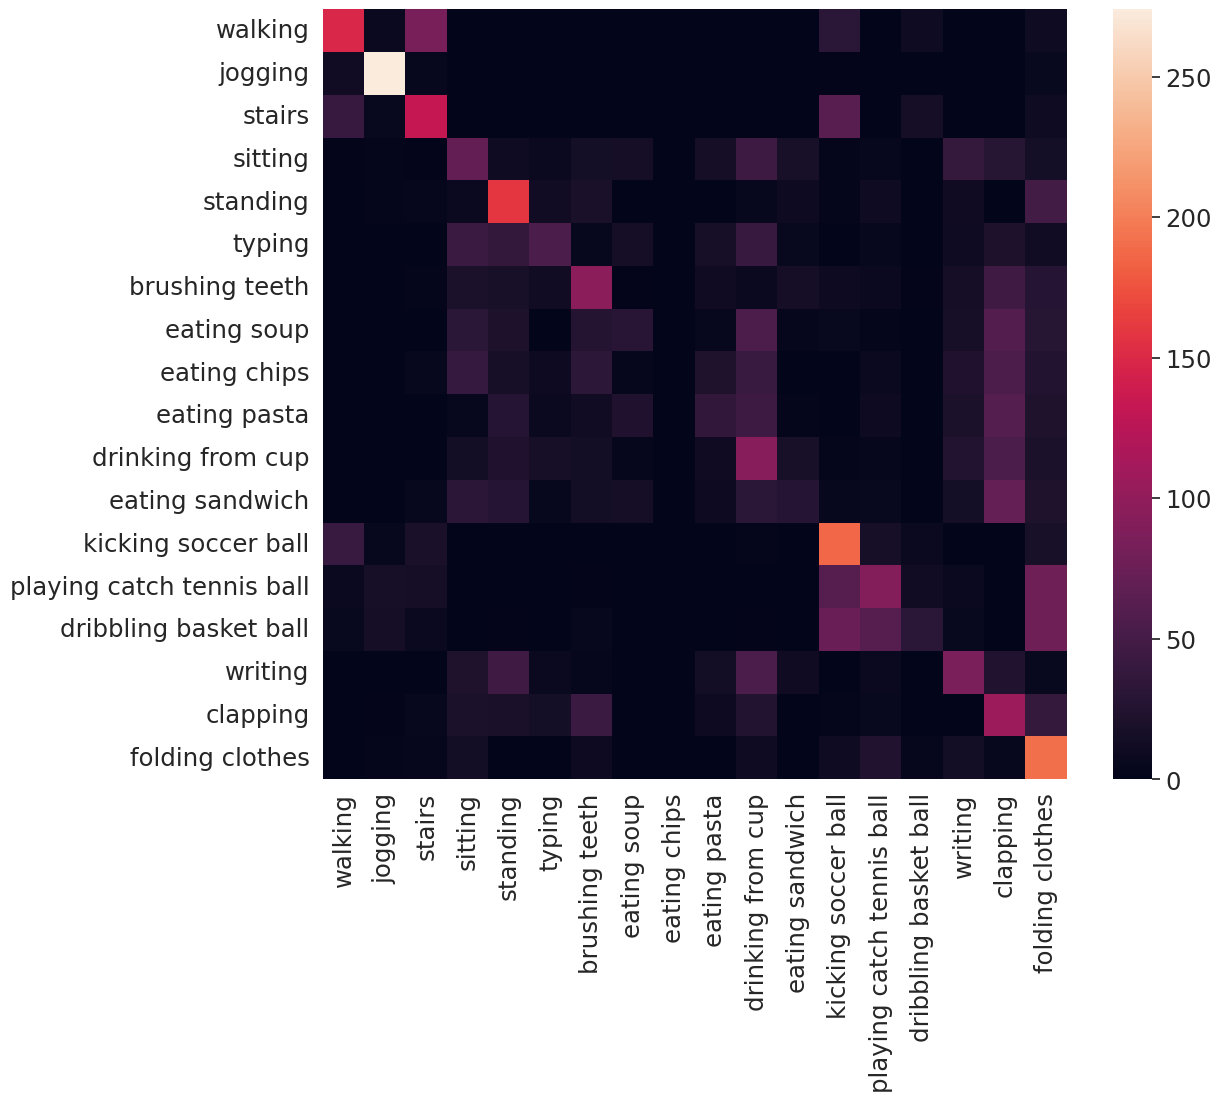

In [58]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
#sns.set(font_scale=1.6)   
_ = sns.heatmap(cm_act)

In [59]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
walking,0.506849
jogging,0.916388
stairs,0.496269
sitting,0.242215
standing,0.540816
typing,0.201493
brushing teeth,0.329932
eating soup,0.101399
eating chips,0.000000
eating pasta,0.133829


In [60]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.57      0.51      0.54       292
           B       0.81      0.92      0.86       299
           C       0.45      0.50      0.47       268
           D       0.22      0.24      0.23       289
           E       0.39      0.54      0.45       294
           F       0.36      0.20      0.26       268
           G       0.33      0.33      0.33       294
           H       0.27      0.10      0.15       286
           I       0.00      0.00      0.00       282
           J       0.24      0.13      0.17       269
           K       0.21      0.31      0.25       301
           L       0.24      0.10      0.14       283
           M       0.40      0.63      0.49       299
           O       0.34      0.32      0.33       290
           P       0.34      0.10      0.16       287
           Q       0.30      0.30      0.30       283
           R       0.20      0.36      0.26       291
           S       0.29    

/home/murthyl/Project/DSP/dsp_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/murthyl/Project/DSP/dsp_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/murthyl/Project/DSP/dsp_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [61]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.35095874491574663

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_classifier = RandomForestClassifier(**dt_model_gs.best_params_)
my_param_grid = {'bootstrap': [True], 
                 'n_estimators': [50, 100, 200], 
                 'oob_score': [True, False], 
                 'warm_start': [True, False]}

In [64]:
rf_model_gs = GridSearchCV(estimator = rf_classifier, 
                           param_grid = my_param_grid, 
                           scoring = 'accuracy',
                           cv = my_cv)
rf_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=RandomForestClassifier(criterion='entropy',
                                              min_impurity_decrease=0.007,
                                              min_samples_leaf=6,
                                              min_weight_fraction_leaf=0.01),
             param_grid={'bootstrap': [True], 'n_estimators': [50, 100, 200],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [65]:
rf_best_classifier = rf_model_gs.best_estimator_
rf_model_gs.cv_results_

{'mean_fit_time': array([ 5.18026433,  5.19439354,  5.10005035,  5.14825315, 10.396838  ,
        10.45668979, 10.22811708, 10.35830784, 20.85477624, 20.82481952,
        20.47628469, 20.45861855]),
 'std_fit_time': array([0.07832158, 0.00800813, 0.02741782, 0.06079354, 0.09317303,
        0.09236883, 0.03471663, 0.09006582, 0.30860694, 0.11052116,
        0.17358649, 0.09171973]),
 'mean_score_time': array([0.03572063, 0.03537383, 0.03555107, 0.03517795, 0.06436725,
        0.06546588, 0.06503234, 0.06376882, 0.12245564, 0.12349758,
        0.12241154, 0.12216444]),
 'std_score_time': array([0.00055074, 0.00035059, 0.00043502, 0.00021646, 0.00083718,
        0.00047419, 0.00083465, 0.00032608, 0.00132868, 0.00141305,
        0.00066889, 0.00075434]),
 'param_bootstrap': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True, True, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, Fal

In [66]:
scores = cross_val_score(rf_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.44544867656552617,
 0.4501829137077685,
 0.4615881213686249,
 0.4744996772111039,
 0.46137292877125025]

In [67]:
y_train_pred = rf_best_classifier.predict(X_train)
#print(pd.DataFrame(y_train_pred))
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.4795635048750565

In [68]:
y_test_pred = rf_best_classifier.predict(X_test)

In [69]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
#                      y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=rf_best_classifier.classes_,
                      columns=rf_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act


,walking,jogging,stairs,sitting,standing,typing,brushing teeth,eating soup,eating chips,eating pasta,drinking from cup,eating sandwich,kicking soccer ball,playing catch tennis ball,dribbling basket ball,writing,clapping,folding clothes
walking,187,20,60,0,0,0,0,0,0,0,0,0,23,0,1,0,0,1
jogging,13,282,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
stairs,80,15,120,0,0,0,0,0,0,0,0,0,40,4,7,0,0,2
sitting,6,1,1,99,21,5,10,17,9,1,36,5,6,0,3,27,31,11
standing,1,0,0,0,226,0,0,0,3,0,2,0,9,6,8,3,1,35
typing,1,0,1,8,41,82,2,5,29,0,27,2,4,3,2,29,16,16
brushing teeth,5,0,2,2,31,4,119,3,7,7,19,0,11,4,3,10,42,25
eating soup,2,0,0,22,22,11,25,49,22,5,54,6,2,4,3,6,25,28
eating chips,2,0,0,8,27,4,13,7,93,16,25,3,6,0,3,17,33,25
eating pasta,0,0,0,25,27,5,2,16,9,72,36,5,0,2,2,20,28,20


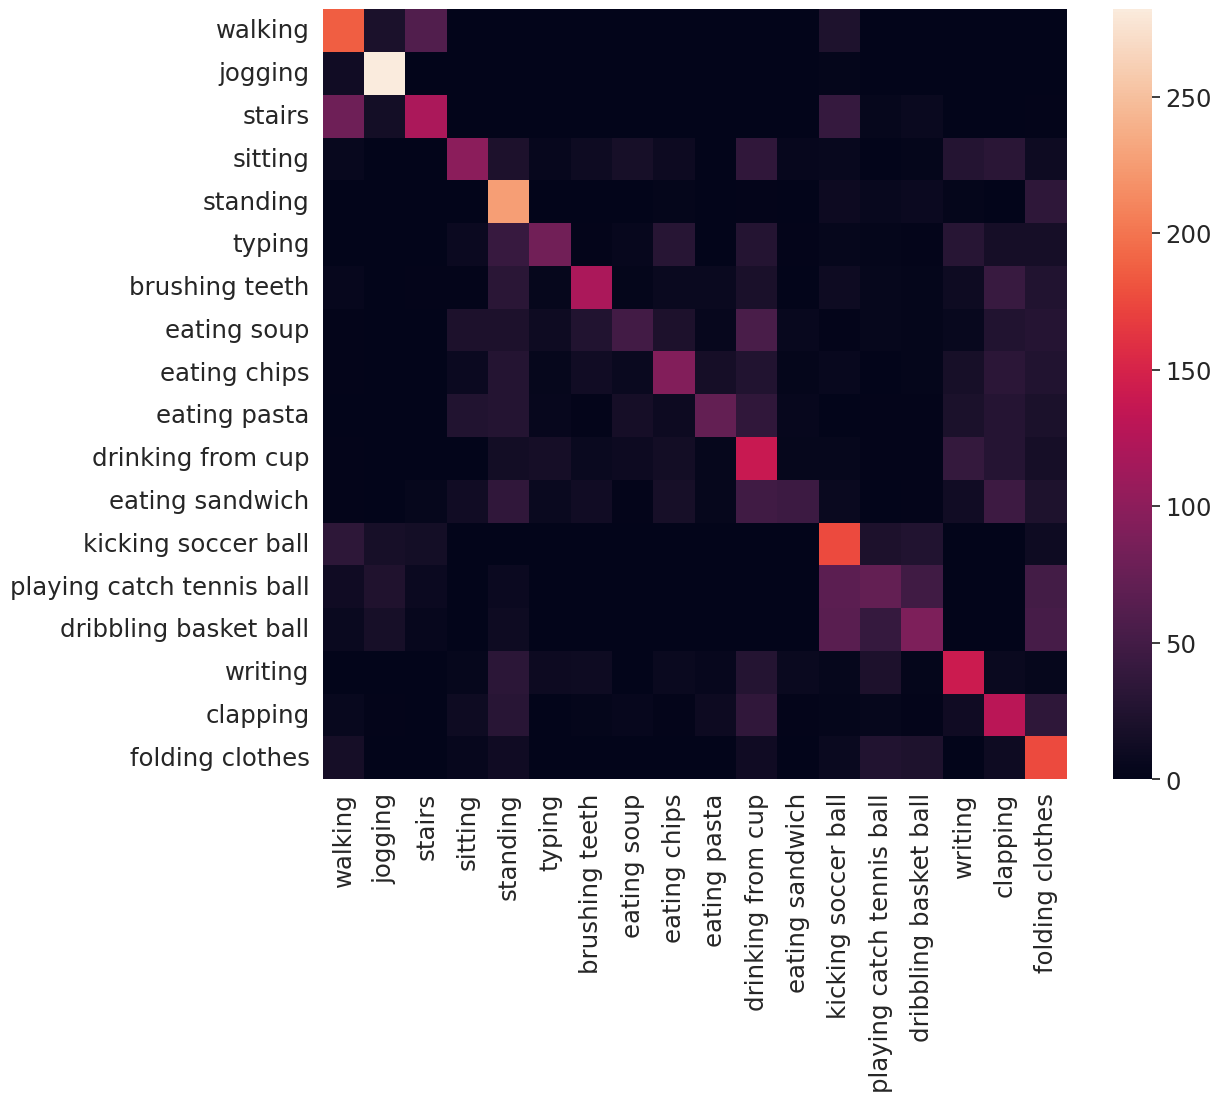

In [70]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
_ = sns.heatmap(cm_act)

In [71]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

,0
walking,0.640411
jogging,0.943144
stairs,0.447761
sitting,0.342561
standing,0.768707
typing,0.305970
brushing teeth,0.404762
eating soup,0.171329
eating chips,0.329787
eating pasta,0.267658


In [72]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.50      0.64      0.56       292
           B       0.74      0.94      0.83       299
           C       0.55      0.45      0.49       268
           D       0.50      0.34      0.41       289
           E       0.42      0.77      0.54       294
           F       0.57      0.31      0.40       268
           G       0.58      0.40      0.48       294
           H       0.43      0.17      0.25       286
           I       0.44      0.33      0.38       282
           J       0.59      0.27      0.37       269
           K       0.30      0.46      0.36       301
           L       0.57      0.16      0.25       283
           M       0.40      0.59      0.48       299
           O       0.34      0.25      0.29       290
           P       0.40      0.31      0.35       287
           Q       0.45      0.50      0.47       283
           R       0.32      0.44      0.38       291
           S       0.33    

In [73]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.4450900639163277